In [1]:
import datetime
import pandas as pd
import numpy as np

In [4]:
!python --version

Python 3.9.12


In [5]:
!echo $PYTHONPATH

$PYTHONPATH


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

## 1.0: Load data 

In [7]:
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1

In [8]:
df1.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [9]:
df1_scaled = StandardScaler().fit_transform(df1)

In [10]:
db = DBSCAN(eps=0.5, min_samples=10).fit(df1_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [11]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [12]:
print('Estimated clusters: %d' % n_clusters_)
print('number of noise points: %d' % n_noise_)
print("Silhouette : %0.3f"
      % metrics.silhouette_score(df1_scaled, labels))
# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

Estimated clusters: 5
number of noise points: 0
Silhouette : 0.805


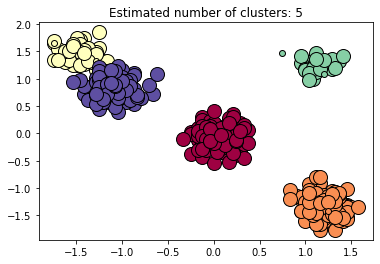

In [13]:
#this is from some blog post, please check if it's legit, lol
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df1_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df1_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [14]:
df1.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [15]:
df1 = StandardScaler().fit_transform(df1)

In [16]:
df1= pd.DataFrame(StandardScaler().fit_transform(df1))


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


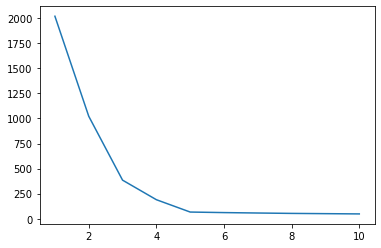

In [17]:
inertia_score = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df1)
  inertia_score.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_score)

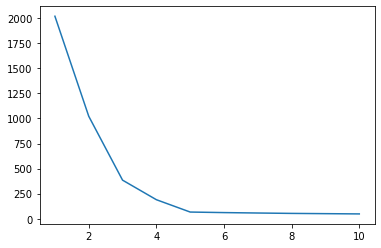

In [18]:
plt.plot(range(1,11), inertia_score)


In [19]:
clustering = KMeans(n_clusters= 5)
clustering.fit(df1[[0,1,2,3]])
df1['cluster type'] = clustering.labels_
df1.head

<bound method NDFrame.head of             0         1         2         3  cluster type
0   -0.042287  0.062733  1.103593 -1.072467             3
1   -0.000821  0.174811  1.102641 -1.303473             3
2    0.123577 -0.021200  0.761727 -0.526556             3
3   -0.000821 -0.031712  1.004705 -0.913395             3
4    1.160228 -1.606165 -0.602619  1.012686             1
..        ...       ...       ...       ...           ...
500 -1.286268  0.714535 -0.453557  0.621787             2
501  1.409024 -1.545704 -1.164109  1.235201             1
502  1.284626 -1.118447 -0.578054  0.855313             1
503  1.326092 -1.524929 -0.579866  1.322452             1
504  1.243160 -1.258335 -0.831890  0.510463             1

[505 rows x 5 columns]>

In [20]:
df1['cluster type'].unique()

array([3, 1, 0, 4, 2])

In [21]:
df2 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")

In [24]:
df1.loc[df1['cluster type'] == 0 ].describe()

,0,1,2,3,cluster type
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,-1.444668,1.460507,1.510580,-1.572496,0.0
std,0.151881,0.158213,0.167578,0.258428,0.0
min,-1.742394,1.156782,1.162288,-2.399206,0.0
25%,-1.535064,1.321811,1.414447,-1.736765,0.0
50%,-1.431399,1.464202,1.486615,-1.516989,0.0
75%,-1.327734,1.555248,1.624629,-1.390602,0.0
max,-1.161870,1.849048,1.908103,-1.167596,0.0


In [ ]:
#Cluster 0: Mean Age = 87.75, Income = $27,866  Spending score: 0.32, Savings $16,659 ,ie, Aged people with low spending score and considerable savings
#Cluster 1: Mean Age = 59.95, Income = $72448  Spending score: 0.77, Savings $14962.778066

#Cluster 2: Mean Age = 32.77, Income = $105265  Spending score: 0.30, Savings $14962

#Cluster 3: Mean Age = 24.18, Income = $128029  Spending score: 0.8968, Savings $4087,  High income millenials. High disposable income with minimal savings

#Cluster : Mean Age = 86.000000, Income = $119944.040000  Spending score: 0.068378, Savings $14808.683793